## Project Description

This project will mainly focused on EDA (Exploratory Data Analysis) on Supermarket Sales dataset that obtain from Kaggle. The dataset contains 2019 sales data from January through March. There are 9 charts being shown in this notebook to assist decision making process from the dataset.

Dataset Link: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

## Import Necessary Library

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

## Read Dataset

In [199]:
df = pd.read_csv('dataset/supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [201]:
df.shape

(1000, 17)

In [202]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Convert Data Type

In [203]:
df['Date'] = pd.to_datetime(df['Date'])

In [204]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Add "Purchase Hour" Column

In [205]:
df['Purchase Hour'] = pd.to_numeric(df['Time'].str[:2])

In [206]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Purchase Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10


## 1. Number Of Transaction That Occur From January To March 2019

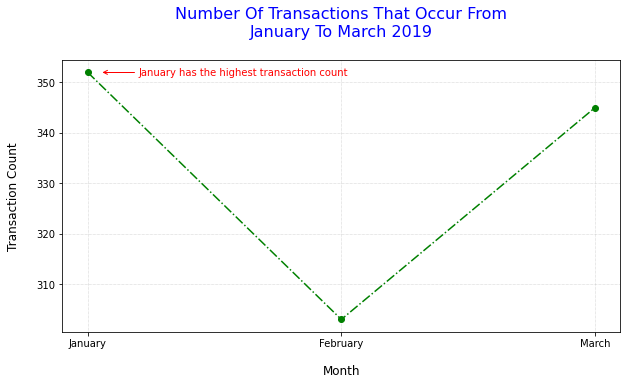

In [207]:
month_map = {
    1: 'January',
    2: 'February',
    3: 'March'
}

transaction_count = df.groupby(df['Date'].dt.month)['Invoice ID'].count().reset_index().rename(columns={'Date': 'Month', 'Invoice ID': 'Count'})
transaction_count['Month'] = transaction_count['Month'].apply(lambda x: month_map[x])

plt.figure(figsize=(10, 5))
plt.plot(transaction_count['Month'], transaction_count['Count'], marker='o', color='green', linestyle='-.')
plt.grid(color='darkgray', linestyle=':', linewidth=.5)
plt.title('Number Of Transactions That Occur From\nJanuary To March 2019', fontsize=16, color='blue', pad=24)
plt.xlabel('Month', fontsize=12, labelpad=16)
plt.ylabel('Transaction Count', fontsize=12, labelpad=16)
plt.annotate('January has the highest transaction count', xy=(.05, 352), xytext=(.2, 351.3), color='red', arrowprops=dict(arrowstyle='->', connectionstyle='angle', color='red'))
plt.show()

## 2. Product Line Sold Based On Customer Gender

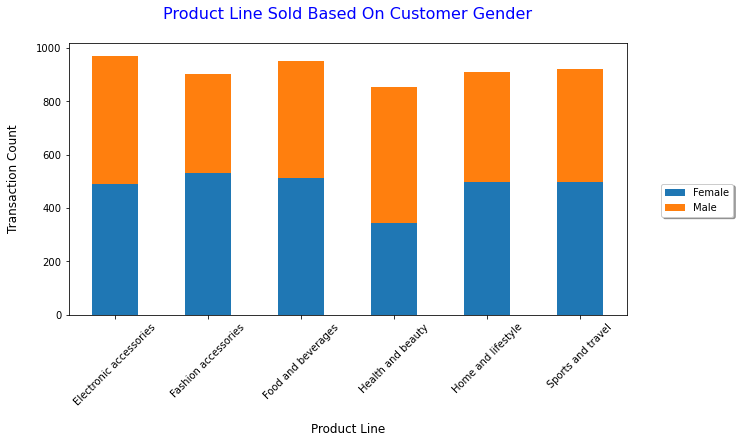

In [208]:
product_line = df.groupby(['Product line', 'Gender'])['Quantity'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)

plt.title('Product Line Sold Based On Customer Gender', color='blue', fontsize=16, pad=24)
plt.legend(bbox_to_anchor=(1.2, .5), shadow=True)
plt.xlabel('Product Line', fontsize=12, labelpad=16)
plt.ylabel('Transaction Count', fontsize=12, labelpad=16)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(10, 5)
plt.show()

## 3. Hour That Customer Most Often Do Transaction

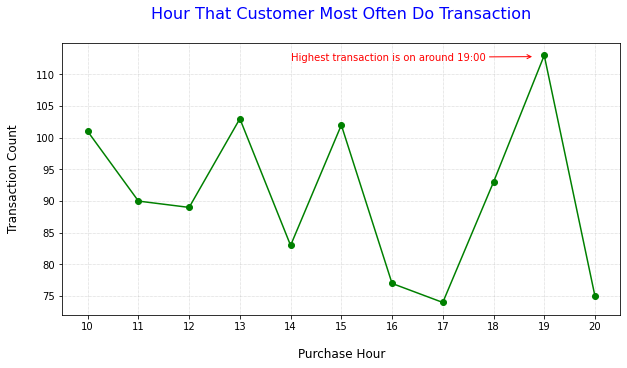

In [209]:
transaction_time = df.groupby('Purchase Hour')['Invoice ID'].count().reset_index().rename(columns={'Invoice ID': 'Count'})

plt.figure(figsize=(10, 5))
plt.plot(transaction_time['Purchase Hour'], transaction_time['Count'], color='green', marker='o')
plt.grid(color='darkgray', linestyle=':', linewidth=.5)
plt.title('Hour That Customer Most Often Do Transaction', color='blue', fontsize=16, pad=24)
plt.xlabel('Purchase Hour', fontsize=12, labelpad=16)
plt.ylabel('Transaction Count', fontsize=12, labelpad=16)
plt.xticks(range(10, 21))
plt.annotate('Highest transaction is on around 19:00', xy=(18.8, 112.8), xytext=(14, 112.2), color='red', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red'))
plt.show()

## 4. Transaction Count By Customer Type

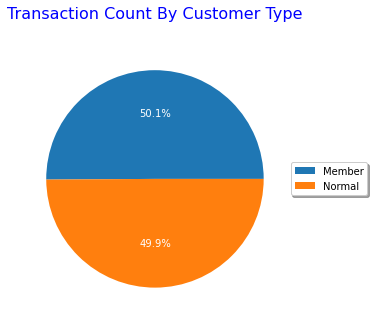

In [210]:
transaction_by_customer = df.groupby('Customer type')['Invoice ID'].count().reset_index().rename(columns={'Invoice ID': 'Count'})

plt.figure(figsize=(10, 5))
patches, _, texts = plt.pie(transaction_by_customer['Count'], autopct='%1.1f%%')
for text in texts:
    text.set_color('white')
plt.title('Transaction Count By Customer Type', color='blue', fontsize=16, pad=24)
plt.legend(patches, ['Member', 'Normal'], loc='right', bbox_to_anchor=(1.3, 0.5), shadow=True)
plt.show()

## 5. Product Line Average Rating

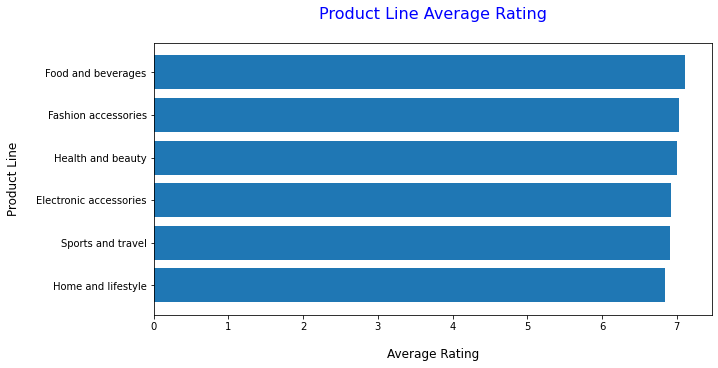

In [211]:
product_rating = df.groupby('Product line')['Rating'].mean().sort_values().reset_index()

plt.figure(figsize=(10, 5))
plt.barh(product_rating['Product line'], product_rating['Rating'])
plt.title('Product Line Average Rating', fontsize=16, color='blue', pad=24)
plt.xlabel('Average Rating', fontsize=12, labelpad=16)
plt.ylabel('Product Line', fontsize=12, labelpad=16)
plt.show()

## 6. Number Of Transactions Based On City

In [212]:
city_transactions = df.groupby('City')['Invoice ID'].count().reset_index().rename(columns={'Invoice ID': 'Count'})

city_transactions_list = []

i = 0
for _, col_data in city_transactions.iteritems():
    if i == 0:
        city = col_data.to_numpy()
        for c in city:
            city_map = {}
            city_map['City'] = c
            city_map['Count'] = 0
            city_map['Latitude'] = 16.866070 if c == 'Yangon' else 19.874269 if c == 'Naypyitaw' else 21.958828
            city_map['Longitude'] = 96.195129 if c == 'Yangon' else 96.0785104 if c == 'Naypyitaw' else 96.093292
            city_transactions_list.append(city_map)
        i += 1
    else:
        curr_idx = 0
        value = col_data.to_numpy()
        for c in city:
            city_transactions_list[curr_idx]['Count'] = value[curr_idx]
            curr_idx += 1
            
m = folium.Map(location=[16.866070, 96.195129], zoom_start=5)
for city in city_transactions_list:
    folium.Marker(location=[city['Latitude'], city['Longitude']], popup='<strong>' + city['City'] + '</strong><p>Transaction Count:' + str(city['Count']) + '</p>', icon=folium.Icon(color='red')).add_to(m)
m

## 7. Total Revenue By Product Line Based On Customer Gender

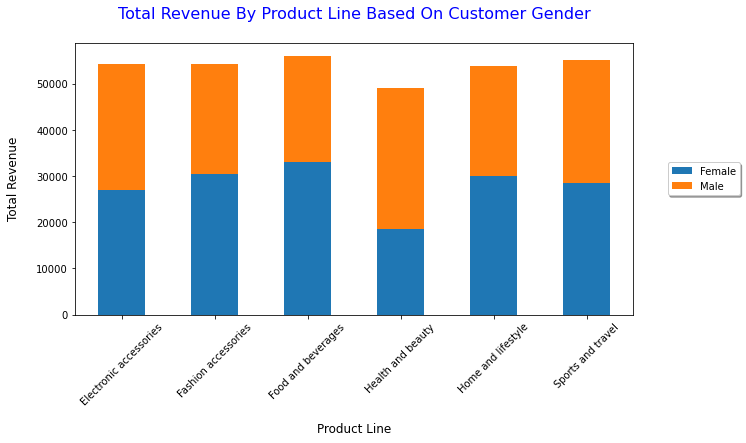

In [213]:
product_revenue = df.groupby(['Product line', 'Gender'])['Total'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)

plt.title('Total Revenue By Product Line Based On Customer Gender', fontsize=16, pad=24, color='blue')
plt.xlabel('Product Line', fontsize=12, labelpad=16)
plt.ylabel('Total Revenue', fontsize=12, labelpad=16)
plt.legend(loc='right', bbox_to_anchor=(1.2, .5), shadow=True)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(10, 5)
plt.show()

## 8. Payment Method Being Used By Customer For Doing Transaction

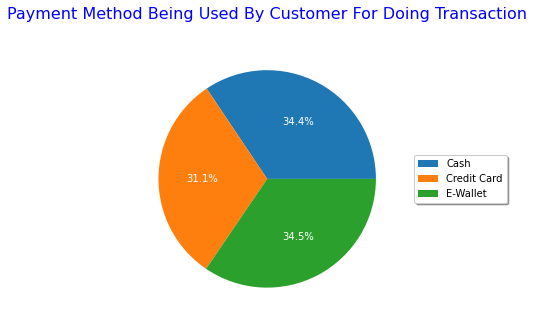

In [214]:
payment_method = df.groupby('Payment')['Invoice ID'].count().reset_index().rename(columns={'Payment': 'Method', 'Invoice ID': 'Count'})

plt.figure(figsize=(10, 5))
patches, _, texts = plt.pie(payment_method['Count'], autopct='%1.1f%%')
for text in texts:
    text.set_color('white')
plt.title('Payment Method Being Used By Customer For Doing Transaction', color='blue', fontsize=16, pad=24)
plt.legend(patches, ['Cash', 'Credit Card', 'E-Wallet'], loc='right', bbox_to_anchor=(1.4, 0.5), shadow=True)
plt.show()

## 9. Product Line Gross Income By Customer Type

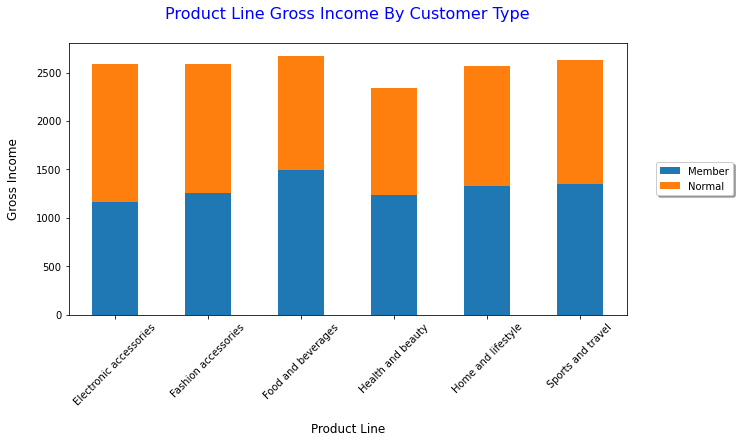

In [215]:
product_gross_income = df.groupby(['Product line', 'Customer type'])['gross income'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)

plt.title('Product Line Gross Income By Customer Type', color='blue', fontsize=16, pad=24)
plt.xlabel('Product Line' , fontsize=12, labelpad=16)
plt.ylabel('Gross Income', fontsize=12, labelpad=16)
plt.legend(loc='right', bbox_to_anchor=(1.2, .5), shadow=True)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(10, 5)
plt.show()

## Summary From Dataset

1. Most of female customer spend their money on "Fashion Accessories" product line, while, male customer mostly spend their money on "Electronic Accessories" and "Health and Beauty" product line
2. Most customer do their transaction on around 7PM based on the data
3. The highest average rating among all product line is "Food and Beverages", while, the lowest average rating among all product line is "Home and Lifestyle"
4. Yangon city has the most transaction count compare to other city, with 340 transaction count on the first quartal of 2019
5. "Food and Beverages" product line revenue mostly came from female customers, while, "Health and Beauty" product line revenue mostly came from male customers
6. "Electronic Accessories" product line gross income mostly came from normal type customers, while, "Food and Beverages" product line gross income mostly came from member type customers